In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.read_csv("/content/drive/MyDrive/transformed_data.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
df.value_counts('Class')

Class
0    284315
1       492
dtype: int64

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [4]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [5]:
from joblib import load,dump
from sklearn.ensemble import VotingClassifier
xgb1=load("/content/drive/MyDrive/saved models/xgb_smote_FD.joblib")
xgb2=load("/content/drive/MyDrive/saved models/xgb_adasyn_FD.joblib")
xgb3=load("/content/drive/MyDrive/saved models/xgb_smoteENN_FD.joblib")
lgb1=load("/content/drive/MyDrive/saved models/lightgbm_smote_FD.joblib")
lgb2=load("/content/drive/MyDrive/saved models/lightgbm_adasyn_FD.joblib")
lgb3=load("/content/drive/MyDrive/saved models/lightgbm_smoteENN_FD.joblib")
rf1=load("/content/drive/MyDrive/saved models/rf_smote_FD.joblib")
rf2=load("/content/drive/MyDrive/saved models/rf_adasyn_FD.joblib")
rf3=load("/content/drive/MyDrive/saved models/rf_smoteENN_FD.joblib")

from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_predict

voting_clf = VotingClassifier(
    estimators=[
        ('xgb1', xgb1),
        ('xgb2', xgb2),
        ('xgb3', xgb3),
        ('lgb1', lgb1),
        ('lgb2', lgb2),
        ('lgb3', lgb3),
        ('rf1', rf1),
        ('rf2', rf2),
        ('rf3', rf3)
    ],
    voting='hard'
)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 1.4.1.post1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [6]:
voting_clf.fit(X_train_resampled, y_train_resampled)

[LightGBM] [Info] Number of positive: 227440, number of negative: 227440
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.264586 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 454880, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 227440, number of negative: 227440
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.270475 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 454880, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 227440, number of negative: 227440
[LightGBM] [Info] Auto-choosing col-wise mu

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


VotingClassifier(estimators=[('xgb1',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_r...
                              LGBMClassifier(learning_rate=0.2,
                                             n_estimators=150, num_leaves=40,
                                             subsample=0.8)),
                             ('rf1',
                              RandomForestClassifier(max_features='auto',
                                                     min_samples_leaf=2,
                                                     min_samples_split=5,
                                                     n_estimators=200)),
                             ('rf2',
                              RandomForestClassifier(bootstrap=False,
                                                     max_features='log2',
                                                     min_samples_split=10,
                                                     n_estimators=50)),
                             ('rf3',
                              RandomForestClassifier(bootstrap=False,
                                                     max_features='auto',
                                                     min_samples_leaf=4))])

In [7]:
y_pred=voting_clf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56879
           1       0.80      0.84      0.82        83

    accuracy                           1.00     56962
   macro avg       0.90      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [9]:
# dump(voting_clf, 'voting_.FDjoblib')


['voting_.FDjoblib']

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56879
           1       0.80      0.84      0.82        83

    accuracy                           1.00     56962
   macro avg       0.90      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962



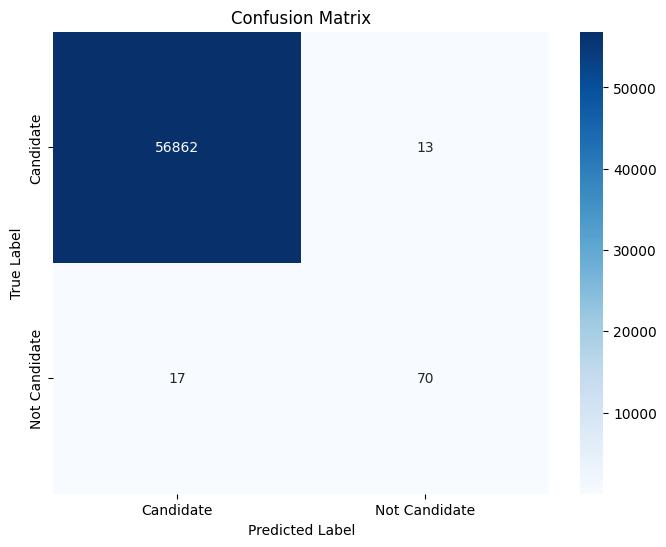

In [13]:
from joblib import load
clf=load("C:\\Users\\Sarrang\\FindDefault\\saved models\\voting_cf.joblib")
y_pred=clf.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_pred,y_test))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('XGBoost adasyn Confusion Matrix')
plt.show()
